In [21]:
import pandas as pd
from docx import Document
from docx.shared import Inches

df = pd.read_csv('vgsales.csv')
doc = Document()
doc.add_heading('Tipos de Dados e Descrições das Variáveis', 0)
table = doc.add_table(rows=1, cols=3)
table.style = 'Table Grid'
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variável'
hdr_cells[1].text = 'Tipo'
hdr_cells[2].text = 'Descrição'

descricoes = {
    'Rank': 'Posição do jogo em um ranking geral.',
    'Name': 'Nome do jogo.',
    'Platform': 'Plataforma em que o jogo foi lançado.',
    'Year': 'Ano de lançamento.',
    'Genre': 'Gênero do jogo.',
    'Publisher': 'Editora do jogo.',
    'NA_Sales': 'Vendas na América do Norte.',
    'EU_Sales': 'Vendas na Europa.',
    'JP_Sales': 'Vendas no Japão.',
    'Other_Sales': 'Vendas em outras regiões.',
    'Global_Sales': 'Vendas globais.'
}

for coluna, tipo in df.dtypes.items():
    row_cells = table.add_row().cells
    row_cells[0].text = coluna
    row_cells[1].text = str(tipo)
    row_cells[2].text = descricoes.get(coluna, '')

doc.save('tipos_e_descricoes.docx')
print("Documento Word 'tipos_e_descricoes.docx' criado com sucesso.")

Documento Word 'tipos_e_descricoes.docx' criado com sucesso.


In [24]:
doc_nulos = Document()

doc_nulos.add_heading('Valores Nulos por Coluna', level=1)
null_table = doc_nulos.add_table(rows=1, cols=2)
null_table.style = 'Table Grid'
hdr_cells = null_table.rows[0].cells
hdr_cells[0].text = 'Coluna'
hdr_cells[1].text = 'Quantidade de Nulos'

for coluna, nulos in df.isnull().sum().items():
    row_cells = null_table.add_row().cells
    row_cells[0].text = coluna
    row_cells[1].text = str(nulos)

doc_nulos.save('valores_nulos.docx')
print("Novo documento Word 'valores_nulos.docx' criado com a tabela de valores nulos.")


Novo documento Word 'valores_nulos.docx' criado com a tabela de valores nulos.


In [25]:
linhas_com_nulos = df.isnull().any(axis=1).sum()
print(f"Número de linhas com valores nulos: {linhas_com_nulos}")
resposta = input("Deseja realmente excluir essas linhas? (s/n): ").lower()

if resposta == 's':
    df_limpo = df.dropna()
    linhas_removidas = len(df) - len(df_limpo)
    print(f"Número de linhas removidas: {linhas_removidas}")
    df = df_limpo
    print("Linhas com valores nulos foram removidas com sucesso.")
    df.to_csv('vgsales_limpo.csv', index=False)
    print("DataFrame limpo e salvo")
else:
    print("Operação cancelada. Nenhuma linha foi removida.")

print(f"Número atual de linhas no DataFrame: {len(df)}")


Número de linhas com valores nulos: 36
Número de linhas removidas: 36
Linhas com valores nulos foram removidas com sucesso.
DataFrame limpo salvo como 'vgsales_limpo.csv'
Número atual de linhas no DataFrame: 16288


Gráfico de box plots salvo como 'boxplots_variaveis.png'


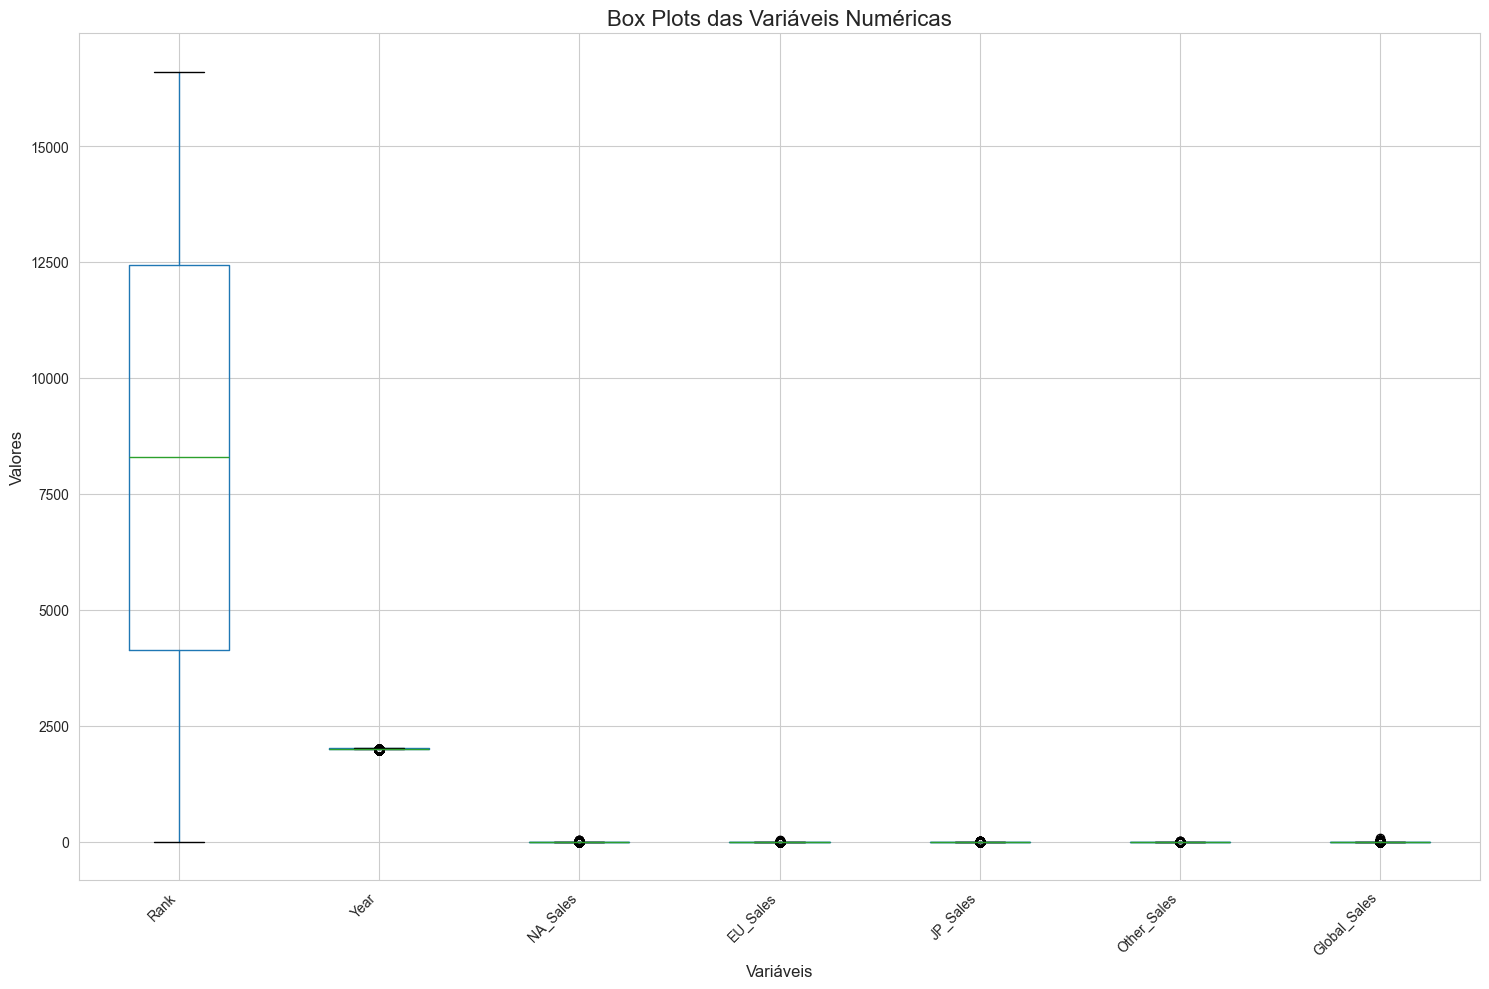


Análise de Z-score:
Rank: 0 outliers detectados (|z| > 3)
Year: 188 outliers detectados (|z| > 3)
NA_Sales: 172 outliers detectados (|z| > 3)
EU_Sales: 213 outliers detectados (|z| > 3)
JP_Sales: 235 outliers detectados (|z| > 3)
Other_Sales: 176 outliers detectados (|z| > 3)
Global_Sales: 178 outliers detectados (|z| > 3)

Gráfico de outliers por variável salvo como 'outliers_por_variavel.png'


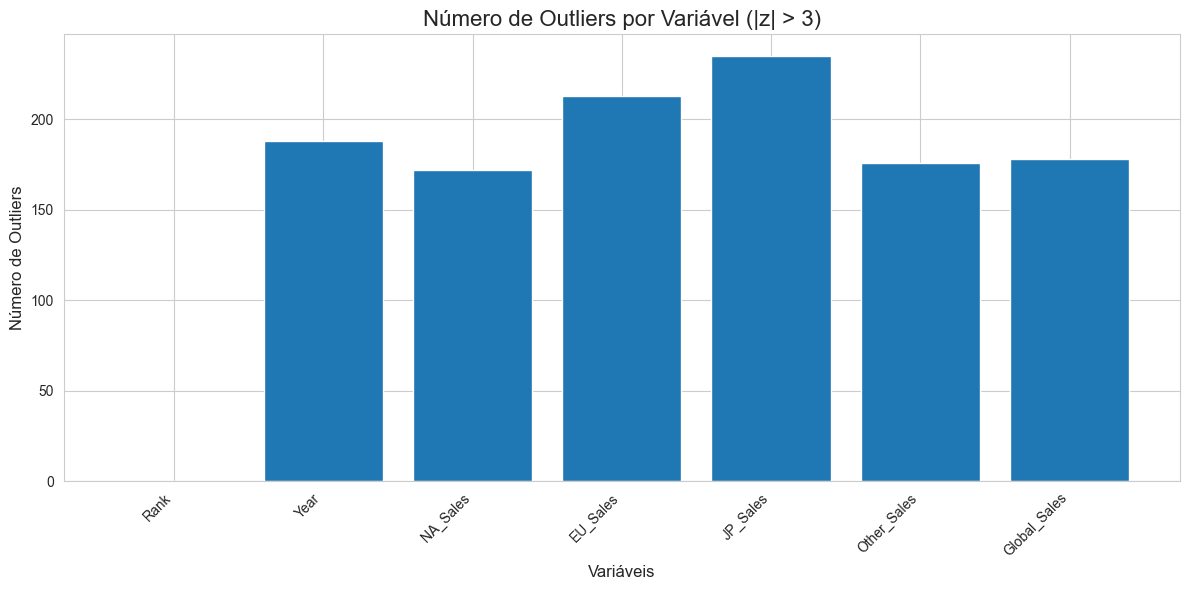

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd

df = pd.read_csv('vgsales_limpo.csv')

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
numeric_vars = df.select_dtypes(include=['float64', 'int64'])
numeric_vars.boxplot()
plt.title('Box Plots das Variáveis Numéricas', fontsize=16)
plt.xlabel('Variáveis', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('boxplots_variaveis.png')
print("Gráfico de box plots salvo como 'boxplots_variaveis.png'")

plt.show()

z_scores = {}
for column in numeric_vars.columns:
    z_scores[column] = np.abs(stats.zscore(numeric_vars[column]))

outliers = {}
for column, scores in z_scores.items():
    outliers[column] = np.sum(scores > 3)

print("\nAnálise de Z-score:")
for column, count in outliers.items():
    print(f"{column}: {count} outliers detectados (|z| > 3)")

plt.figure(figsize=(12, 6))
plt.bar(outliers.keys(), outliers.values())
plt.title('Número de Outliers por Variável (|z| > 3)', fontsize=16)
plt.xlabel('Variáveis', fontsize=12)
plt.ylabel('Número de Outliers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('outliers_por_variavel.png')
print("\nGráfico de outliers por variável salvo como 'outliers_por_variavel.png'")
plt.show()


In [32]:
df_limpo = pd.read_csv('vgsales_limpo.csv')
numeric_vars_limpo = df_limpo.select_dtypes(include=[np.number])

outliers = {}

for column in numeric_vars_limpo.columns:
    z_scores = np.abs(stats.zscore(numeric_vars_limpo[column]))
    outliers[column] = df_limpo[z_scores > 3]

print("\nOutliers encontrados no arquivo limpo:")
for column, outliers_data in outliers.items():
    print(f"\n{column}:")
    print(f"Número de outliers: {len(outliers_data)}")
    print("Primeiros 5 outliers:")
    print(outliers_data.head())

outliers_df = pd.concat(outliers.values(), keys=outliers.keys())
outliers_df.to_csv('outliers.csv')
print("\nOutliers do arquivo limpo salvos como 'outliers.csv'")



Outliers encontrados no arquivo limpo:

Rank:
Número de outliers: 0
Primeiros 5 outliers:
Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []

Year:
Número de outliers: 188
Primeiros 5 outliers:
   Rank             Name Platform  Year     Genre   Publisher  NA_Sales  \
0   259        Asteroids     2600  1980   Shooter       Atari      4.00   
1   545  Missile Command     2600  1980   Shooter       Atari      2.56   
2  1768          Kaboom!     2600  1980      Misc  Activision      1.07   
3  1971         Defender     2600  1980      Misc       Atari      0.99   
4  2671           Boxing     2600  1980  Fighting  Activision      0.72   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0      0.26       0.0         0.05          4.31  
1      0.17       0.0         0.03          2.76  
2      0.07       0.0         0.01          1.15  
3      0.05       0.0         0.01          1.05  
4      0.04

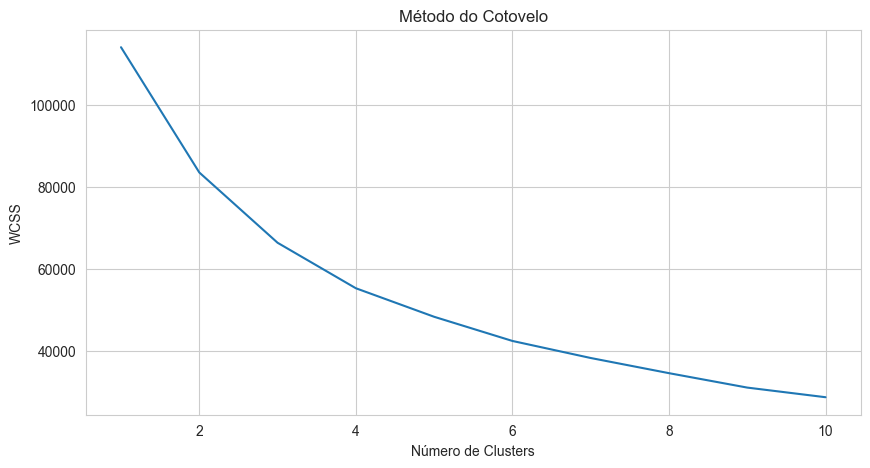


O número ideal de clusters sugerido pelo método do cotovelo é: 2
Gráfico do método do cotovelo salvo como 'metodo_cotovelo.png'


In [33]:
# Importando as bibliotecas necessárias
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

numeric_vars = df_limpo.select_dtypes(include=[np.number])
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_vars)

def calcular_wcss(data):
    wcss = []
    for n in range(1, 11):
        kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

wcss = calcular_wcss(normalized_data)

# Plotando o gráfico do método do cotovelo
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.savefig('metodo_cotovelo.png')
plt.show()

differences = np.diff(wcss)
elbow_point = np.argmin(differences) + 2

print(f"\nO número ideal de clusters sugerido pelo método do cotovelo é: {elbow_point}")
print("Gráfico do método do cotovelo salvo como 'metodo_cotovelo.png'")




In [34]:
# Importando as bibliotecas necessárias
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('vgsales_limpo.csv')
variaveis_numericas = df.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(variaveis_numericas)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(dados_normalizados)
df['Cluster'] = kmeans.labels_
print(df[['Name', 'Platform', 'Year', 'Genre', 'Global_Sales', 'Cluster']].head(10))
print("\nMédia das variáveis numéricas por cluster:")
print(df.groupby('Cluster')[variaveis_numericas.columns].mean())
df.to_csv('vgsales_com_clusters.csv', index=False)
print("\nDataframe com clusters salvo como 'vgsales_com_clusters.csv'")


              Name Platform  Year     Genre  Global_Sales  Cluster
0        Asteroids     2600  1980   Shooter          4.31        1
1  Missile Command     2600  1980   Shooter          2.76        1
2          Kaboom!     2600  1980      Misc          1.15        1
3         Defender     2600  1980      Misc          1.05        1
4           Boxing     2600  1980  Fighting          0.77        1
5       Ice Hockey     2600  1980    Sports          0.49        1
6          Freeway     2600  1980    Action          0.34        1
7           Bridge     2600  1980      Misc          0.27        1
8         Checkers     2600  1980      Misc          0.24        1
9         Pitfall!     2600  1981  Platform          4.50        1

Média das variáveis numéricas por cluster:
                Rank         Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Cluster                                                                        
0          49.789474  2005.810526  6.976947  4.415684  2.10

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd

# Carregando o arquivo CSV
df = pd.read_csv('vgsales_com_clusters.csv')

# Definindo o gênero manualmente (você pode alterar isso conforme necessário)
genero_input = "Action"

# Verificando se o gênero existe na coluna Genre
if genero_input in df['Genre'].values:
    # Filtrando o DataFrame para o gênero específico
    df_genero = df[df['Genre'] == genero_input]
    
    # Calculando a média de vendas para cada mercado
    vendas_medias = {
        'Japão': df_genero['JP_Sales'].mean(),
        'Europa': df_genero['EU_Sales'].mean(),
        'América do Norte': df_genero['NA_Sales'].mean(),
        'Outros': df_genero['Other_Sales'].mean()
    }
    
    # Encontrando o mercado com maior média de vendas
    mercado_mais_sucesso = max(vendas_medias, key=vendas_medias.get)
    
    print(f"O gênero '{genero_input}' teve mais sucesso no mercado: {mercado_mais_sucesso}")
else:
    print(f"O gênero '{genero_input}' não foi encontrado no conjunto de dados.")


In [3]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Carregando o arquivo CSV
df = pd.read_csv('vgsales_com_clusters.csv')

# Definindo o gênero manualmente (você pode alterar isso conforme necessário)
genero_input = "Action"

# Verificando se o gênero existe na coluna Genre
if genero_input in df['Genre'].values:
    # Filtrando o DataFrame para o gênero específico
    df_genero = df[df['Genre'] == genero_input]
    
    # Preparando os dados
    X = df_genero[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
    y = df_genero['Global_Sales']
    
    # Dividindo os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Normalizando os dados
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Treinando a RNA
    rna = MLPRegressor(hidden_layer_sizes=(100,50), max_iter=1000, random_state=42)
    rna.fit(X_train_scaled, y_train)
    
    # Treinando a Árvore de Decisão
    arvore = DecisionTreeRegressor(random_state=42)
    arvore.fit(X_train, y_train)
    
    # Fazendo previsões
    previsoes_rna = rna.predict(X_test_scaled)
    previsoes_arvore = arvore.predict(X_test)
    
    # Calculando a média das previsões para cada mercado
    mercados = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
    vendas_medias_rna = {mercado: np.mean(previsoes_rna[X_test[mercado] == X_test[mercado].max()]) for mercado in mercados}
    vendas_medias_arvore = {mercado: np.mean(previsoes_arvore[X_test[mercado] == X_test[mercado].max()]) for mercado in mercados}
    
    # Encontrando o mercado com maior média de vendas para cada modelo
    mercado_mais_sucesso_rna = max(vendas_medias_rna, key=vendas_medias_rna.get)
    mercado_mais_sucesso_arvore = max(vendas_medias_arvore, key=vendas_medias_arvore.get)
    
    print(f"Usando RNA, o gênero '{genero_input}' teve mais sucesso no mercado: {mercado_mais_sucesso_rna}")
    print(f"Usando Árvore de Decisão, o gênero '{genero_input}' teve mais sucesso no mercado: {mercado_mais_sucesso_arvore}")
else:
    print(f"O gênero '{genero_input}' não foi encontrado no conjunto de dados.")


ModuleNotFoundError: No module named 'pandas'